In [1]:
import os
import numpy  as np
import tables as tb
import pandas as pd

import matplotlib.pyplot as plt

import pylab
from scipy.stats import norm

from invisible_cities.core.core_functions import shift_to_bin_centers
import invisible_cities.core.fit_functions  as fitf

In [2]:
def title_and_axes(title, x, y, fontsize):
    pylab.title(title, fontsize=fontsize)
    pylab.xlabel(x, fontsize=fontsize)
    pylab.ylabel(y, fontsize=fontsize)
    return

def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]

def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    y, x, p = plt.hist(*args, **kwargs)
    return y, shift_to_bin_centers(x), p

def axis_info(ax, title, xlabel, ylabel, xlim, ylim, fontsize=14):
    ax.set_title(title, size=fontsize)
    ax.set_xlabel(xlabel, size=fontsize)
    ax.set_ylabel(ylabel, size=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plt_info(title, xlabel, ylabel, xlim, ylim, fontsize=14):
    plt.title(title, size=fontsize)
    plt.xlabel(xlabel, size=fontsize)
    plt.ylabel(ylabel, size=fontsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    
def label_hist_mm(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, chi2, dec=3):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} mm'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} mm'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} mm'
    chi2_str  = f'$\chi^2$ = {np.round(chi2,  dec)}'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + chi2_str

def label_hist_rad(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, dec=5):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} rad'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} rad'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} rad'
    fwhm_str_mm1 = f'{np.round(fwhm*150, 3)} ± {np.round(fwhm_err*150, 3)} mm'
    fwhm_str_mm2 = f'{np.round(fwhm*180, 3)} ± {np.round(fwhm_err*180, 3)} mm'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + fwhm_str_mm1 + ' - ' + fwhm_str_mm2

def label_hist_ps(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, chi2, dec=3):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} ps'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} ps'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} ps'
    chi2_str  = f'$\chi^2$ = {np.round(chi2,  dec)}'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + chi2_str


def title_and_axes(title, x, y, fontsize):
    pylab.title(title, fontsize=fontsize)
    pylab.xlabel(x, fontsize=fontsize)
    pylab.ylabel(y, fontsize=fontsize)
    return

In [3]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/tile5_centered/data_reco_info/'

timestamp_thr = [0, 0.25, 0.50, 0.75]

reco_x1, reco_x2 = [], []
reco_y1, reco_y2 = [], []
reco_z1, reco_z2 = [], []

true_x1, true_x2 = [], []
true_y1, true_y2 = [], []
true_z1, true_z2 = [], []

sns_resp1, sns_resp2 = [], []

first_sipm1, first_sipm2 = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]
first_time1, first_time2 = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]

event_ids1           = []
event_ids2           = []
event_ids1_th_charge = []
event_ids2_th_charge = []
event_ids_times      = []

for filename in os.listdir(evts_path+'no_jitter/'):
    if filename.endswith('.npz'):
        my_file = evts_path+'no_jitter/'+filename        
        d = np.load(my_file, allow_pickle=True)
        for i in d[f'reco_x1']:
            reco_x1.append(i)
        for i in d[f'reco_x2']:
            reco_x2.append(i)
        for i in d[f'reco_y1']:
            reco_y1.append(i)
        for i in d[f'reco_y2']:
            reco_y2.append(i)
        for i in d[f'reco_z1']:
            reco_z1.append(i)
        for i in d[f'reco_z2']:
            reco_z2.append(i)
        for i in d[f'true_x1']:
            true_x1.append(i)
        for i in d[f'true_x2']:
            true_x2.append(i)
        for i in d[f'true_y1']:
            true_y1.append(i)
        for i in d[f'true_y2']:
            true_y2.append(i)
        for i in d[f'true_z1']:
            true_z1.append(i)
        for i in d[f'true_z2']:
            true_z2.append(i)
        for i in d[f'sns_resp1']:
            sns_resp1.append(i)
        for i in d[f'sns_resp2']:
            sns_resp2.append(i)

        for i in d[f'event_ids1']:
            event_ids1.append(i)
        for i in d[f'event_ids2']:
            event_ids2.append(i)
        for i in d[f'event_ids1_th_charge']:
            event_ids1_th_charge.append(i)
        for i in d[f'event_ids2_th_charge']:
            event_ids2_th_charge.append(i)
        for i in d[f'event_ids_times']:
            event_ids_times.append(i)
        for j,_ in enumerate(timestamp_thr):
            for i in d[f'first_sipm1_{j}']:
                first_sipm1[j].append(i)
            for i in d[f'first_sipm2_{j}']:
                first_sipm2[j].append(i)
            for i in d[f'first_time1_{j}']:
                first_time1[j].append(i)
            for i in d[f'first_time2_{j}']:
                first_time2[j].append(i)

reco_x1 = np.array(reco_x1)
reco_x2 = np.array(reco_x2)
reco_y1 = np.array(reco_y1)
reco_y2 = np.array(reco_y2)
reco_z1 = np.array(reco_z1)
reco_z2 = np.array(reco_z2)

true_x1 = np.array(true_x1)
true_x2 = np.array(true_x2)
true_y1 = np.array(true_y1)
true_y2 = np.array(true_y2)
true_z1 = np.array(true_z1)
true_z2 = np.array(true_z2)

sns_resp1            = np.array(sns_resp1)
sns_resp2            = np.array(sns_resp2)
event_ids1           = np.array(event_ids1)
event_ids2           = np.array(event_ids2)
event_ids1_th_charge = np.array(event_ids1_th_charge)
event_ids2_th_charge = np.array(event_ids2_th_charge)
event_ids_times      = np.array(event_ids_times)

first_sipm1 = np.array([np.array(i) for i in first_sipm1])
first_sipm2 = np.array([np.array(i) for i in first_sipm2])
first_time1 = np.array([np.array(i) for i in first_time1])
first_time2 = np.array([np.array(i) for i in first_time2])

In [4]:
event_ids_times.dtype, np.array(reco_x1).dtype

(dtype('int32'), dtype('float64'))

In [5]:
diff_x1 = (reco_x1 - true_x1)
diff_y1 = (reco_y1 - true_y1)
diff_z1 = (reco_z1 - true_z1)

diff_x2 = (reco_x2 - true_x2)
diff_y2 = (reco_y2 - true_y2)
diff_z2 = (reco_z2 - true_z2)

In [6]:
print(len(reco_x1), len(reco_x2))
print(len(reco_y1), len(reco_y2))
print(len(reco_z1), len(reco_z2))
print(len(true_x1), len(true_x2))
print(len(true_y1), len(true_y2))
print(len(true_z1), len(true_z2))
print(len(sns_resp1), len(sns_resp2))

print(len(event_ids1), len(event_ids2))
print(len(event_ids1_th_charge), len(event_ids2_th_charge), len(event_ids_times))
print(len(sns_resp1), len(sns_resp2))

print(len(first_sipm1[0]), len(first_sipm1[1]), len(first_sipm1[2]), len(first_sipm1[3]))
print(len(first_sipm2[0]), len(first_sipm2[1]), len(first_sipm2[2]), len(first_sipm2[3]))
print(len(first_time1[0]), len(first_time1[1]), len(first_time1[2]), len(first_time1[3]))
print(len(first_time2[0]), len(first_time2[1]), len(first_time2[2]), len(first_time2[3]))

113503 131049
113503 131049
113503 131049
113503 131049
113503 131049
113503 131049
113503 131049
113503 131049
51799 119173 2815
113503 131049
2815 2815 2815 2815
2815 2815 2815 2815
2815 2815 2815 2815
2815 2815 2815 2815


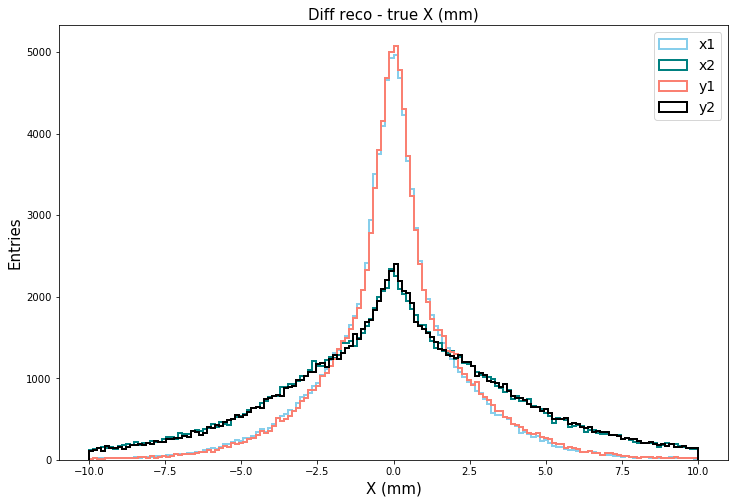

In [7]:
plt.figure(figsize=(12,8))
plt.hist(diff_x1, 150, (-10, 10), color='skyblue', histtype='step', linewidth=2, label=f'x1')
plt.hist(diff_x2, 150, (-10, 10), color='teal',    histtype='step', linewidth=2, label=f'x2')
plt.hist(diff_y1, 150, (-10, 10), color='salmon',  histtype='step', linewidth=2, label=f'y1')
plt.hist(diff_y2, 150, (-10, 10), color='k',       histtype='step', linewidth=2, label=f'y2')

title_and_axes(f'Diff reco - true X (mm)', 'X (mm)', 'Entries', fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [8]:
len(event_ids_times)

2815

In [9]:
sns_resp2[sns_resp2 > 1400]

array([1703, 1862, 1929, ..., 2288, 1718, 1749])

In [10]:
mask_ch1 = np.in1d(event_ids1, event_ids1_th_charge)
mask_ch2 = np.in1d(event_ids2, event_ids2_th_charge)

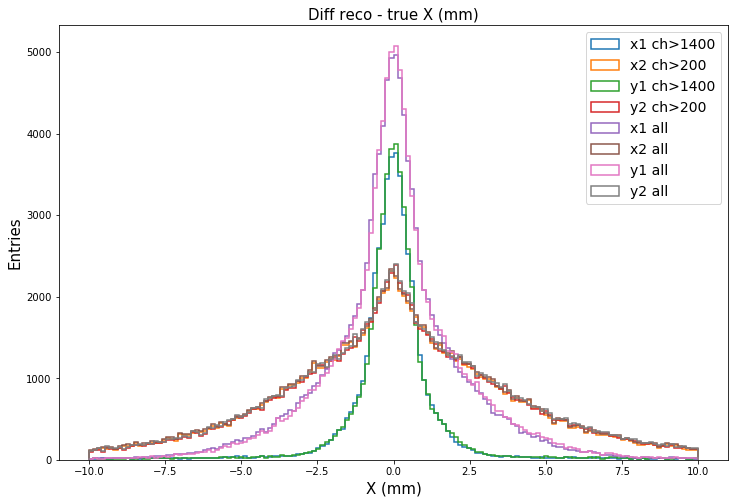

In [11]:
plt.figure(figsize=(12,8))
plt.hist(diff_x1[mask_ch1], 150, (-10, 10), histtype='step', linewidth=1.5, label=f'x1 ch>1400')
plt.hist(diff_x2[mask_ch2], 150, (-10, 10), histtype='step', linewidth=1.5, label=f'x2 ch>200')
plt.hist(diff_y1[mask_ch1], 150, (-10, 10), histtype='step', linewidth=1.5, label=f'y1 ch>1400')
plt.hist(diff_y2[mask_ch2], 150, (-10, 10), histtype='step', linewidth=1.5, label=f'y2 ch>200')
plt.hist(diff_x1,           150, (-10, 10), histtype='step', linewidth=1.5, label=f'x1 all')
plt.hist(diff_x2,           150, (-10, 10), histtype='step', linewidth=1.5, label=f'x2 all')
plt.hist(diff_y1,           150, (-10, 10), histtype='step', linewidth=1.5, label=f'y1 all')
plt.hist(diff_y2,           150, (-10, 10), histtype='step', linewidth=1.5, label=f'y2 all')


title_and_axes(f'Diff reco - true X (mm)', 'X (mm)', 'Entries', fontsize=15)
plt.legend(fontsize=14)
plt.show()

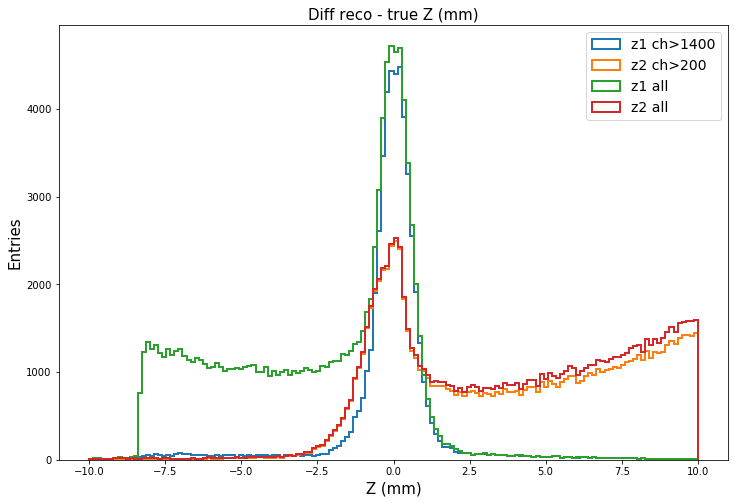

In [12]:
plt.figure(figsize=(12,8))
plt.hist(diff_z1[mask_ch1], 150, (-10, 10), histtype='step', linewidth=2, label=f'z1 ch>1400')
plt.hist(diff_z2[mask_ch2], 150, (-10, 10), histtype='step', linewidth=2, label=f'z2 ch>200')
plt.hist(diff_z1,           150, (-10, 10), histtype='step', linewidth=2, label=f'z1 all')
plt.hist(diff_z2,           150, (-10, 10), histtype='step', linewidth=2, label=f'z2 all')

title_and_axes(f'Diff reco - true Z (mm)', 'Z (mm)', 'Entries', fontsize=15)
plt.legend(fontsize=14)
plt.show()

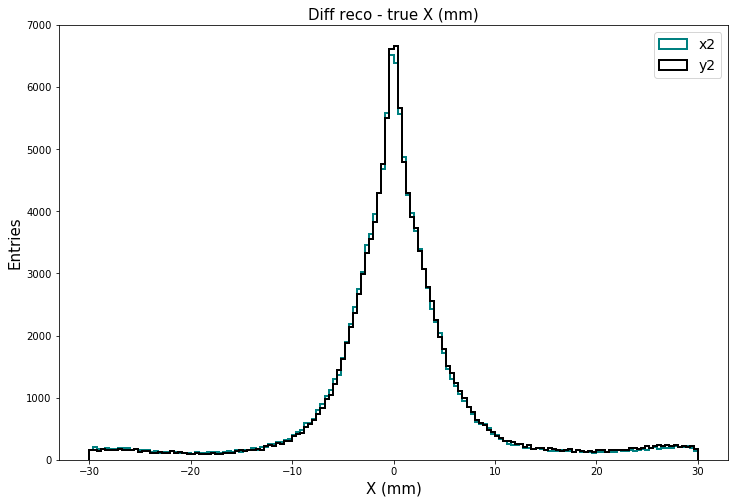

In [13]:
plt.figure(figsize=(12,8))
plt.hist(diff_x2, 150, (-30, 30), color='teal', histtype='step', linewidth=2, label=f'x2')
plt.hist(diff_y2, 150, (-30, 30), color='k', histtype='step', linewidth=2, label=f'y2')

title_and_axes(f'Diff reco - true X (mm)', 'X (mm)', 'Entries', fontsize=15)
plt.legend(fontsize=14)
plt.show()

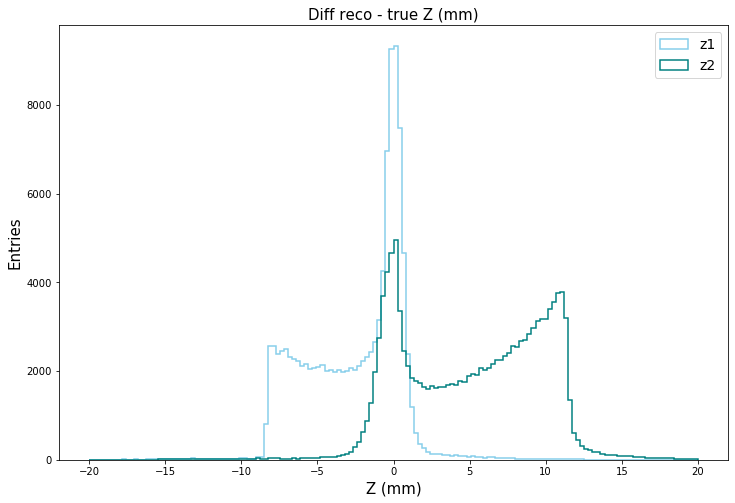

In [14]:
plt.figure(figsize=(12,8))
plt.hist(diff_z1, 150, (-20, 20), color='skyblue', histtype='step', linewidth=1.5, label=f'z1')
plt.hist(diff_z2, 150, (-20, 20), color='teal', histtype='step', linewidth=1.5, label=f'z2')
title_and_axes(f'Diff reco - true Z (mm)', 'Z (mm)', 'Entries', fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [15]:
def fit_gaussian(variable, bins, range_hist, range_fit, max_entries, mm=True):
    
    y, x, _   = hist(variable, bins, range_hist, facecolor='skyblue')
    mu, sigma = norm.fit(variable)
    f         = fitf.fit(fitf.gauss, x, y, (max_entries,mu,sigma), fit_range=range_fit)
    fwhm      = 2.35482 * (np.sqrt(np.var(variable)))
    
    _, mu1,     sigma1     = f .values
    _, mu1_err, sigma1_err = f .errors

    fwhm1, fwhm1_err = sigma1* 2.355, sigma1_err* 2.355
    chi2 = f .chi2
    errs = np.sqrt(y)
    
    if mm:
        pylab.plot(x, fitf.gauss(x, *f.values[:3]), "r--", 
                   label=label_hist_mm(mu1, mu1_err, sigma1, sigma1_err, fwhm1, fwhm1_err, chi2))
    else:
        pylab.plot(x, fitf.gauss(x, *f.values[:3]), "r--", 
                   label=label_hist_ps(mu1, mu1_err, sigma1, sigma1_err, fwhm1, fwhm1_err, chi2, dec=1))
    plt.errorbar(x, y, yerr=errs, fmt='.k', elinewidth=0.5,  linestyle='none', capsize=2, capthick=1)
    pylab.legend(fontsize=13, loc=1)

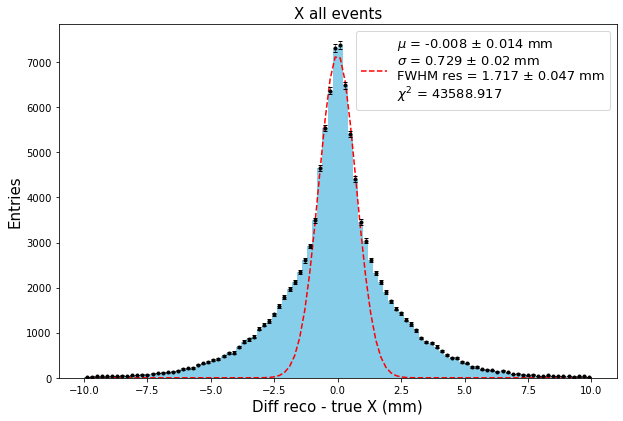

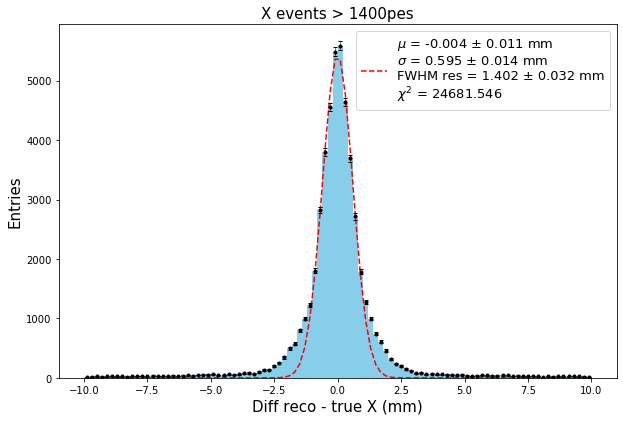

In [16]:
plt.rcParams["figure.figsize"] = 10, 6.5

fit_gaussian(diff_x1, 100, (-10, 10), (-1, 1), 5000)
title_and_axes(f'X all events', 'Diff reco - true X (mm)', 'Entries', fontsize=15)

fit_gaussian(diff_x1[mask_ch1], 100, (-10, 10), (-1, 1), 4000)
title_and_axes(f'X events > 1400pes', 'Diff reco - true X (mm)', 'Entries', fontsize=15)

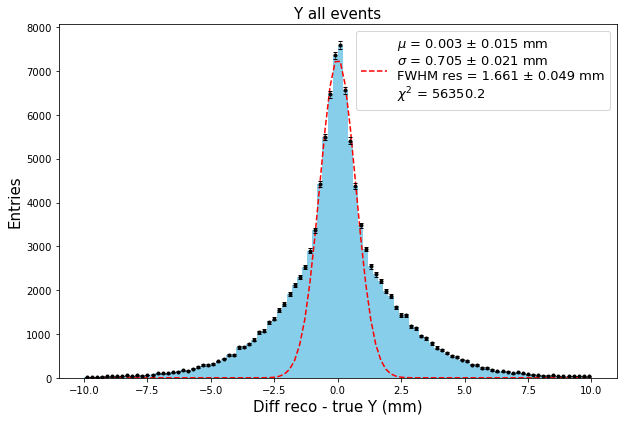

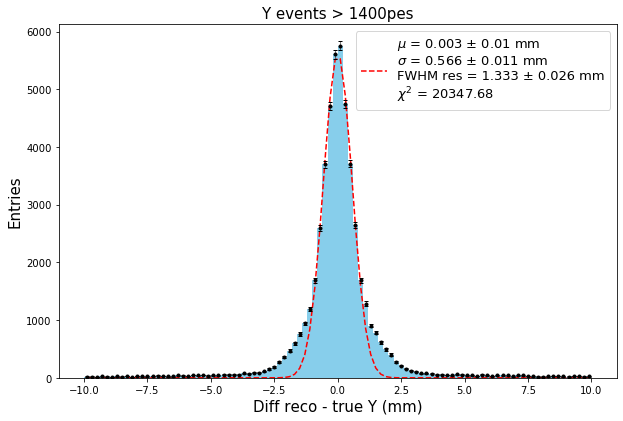

In [17]:
fit_gaussian(diff_y1, 100, (-10, 10), (-1, 1), 5000)
title_and_axes(f'Y all events', 'Diff reco - true Y (mm)', 'Entries', fontsize=15)

fit_gaussian(diff_y1[mask_ch1], 100, (-10, 10), (-1, 1), 4000)
title_and_axes(f'Y events > 1400pes', 'Diff reco - true Y (mm)', 'Entries', fontsize=15)

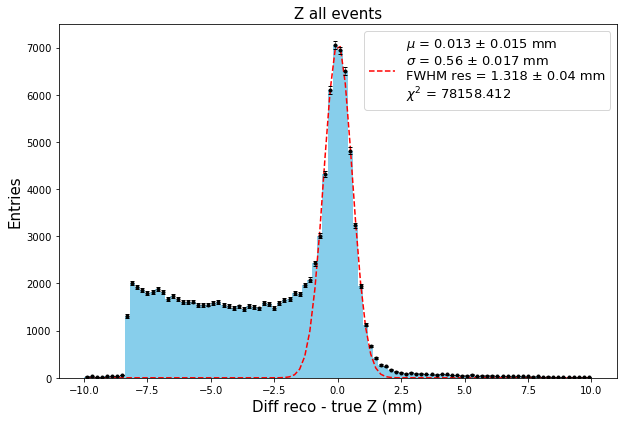

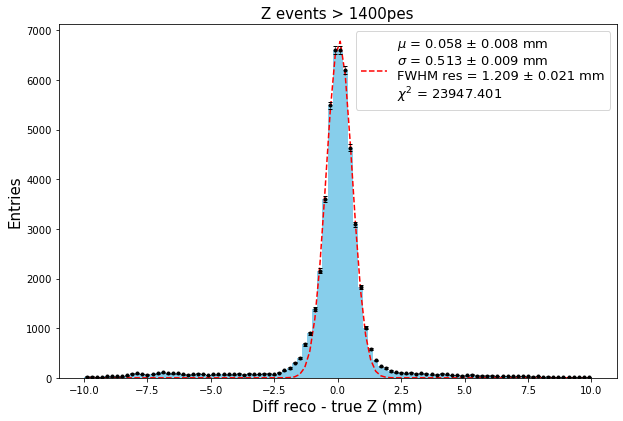

In [18]:
fit_gaussian(diff_z1, 100, (-10, 10), (-1, 1), 5000)
title_and_axes(f'Z all events', 'Diff reco - true Z (mm)', 'Entries', fontsize=15)

fit_gaussian(diff_z1[mask_ch1], 100, (-10, 10), (-1, 1), 4000)
title_and_axes(f'Z events > 1400pes', 'Diff reco - true Z (mm)', 'Entries', fontsize=15)

### Detector plane

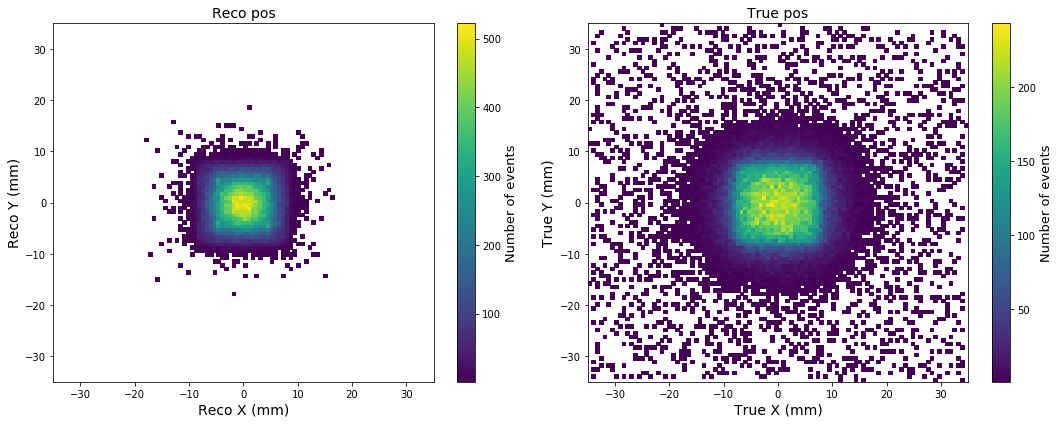

In [19]:
th = 2
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
xybins = 100

h1 = ax1.hist2d(reco_x1, reco_y1, (xybins, xybins), range=((-35,35), (-35,35)), cmin=1)
h2 = ax2.hist2d(true_x1, true_y1, (xybins, xybins), range=((-35,35), (-35,35)), cmin=1)

axis_info(ax1, 'Reco pos', 'Reco X (mm)', 'Reco Y (mm)', (-35, 35), (-35, 35))
axis_info(ax2, 'True pos', 'True X (mm)', 'True Y (mm)', (-35, 35), (-35, 35))

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events', fontsize=13)
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events', fontsize=13)

plt.tight_layout()

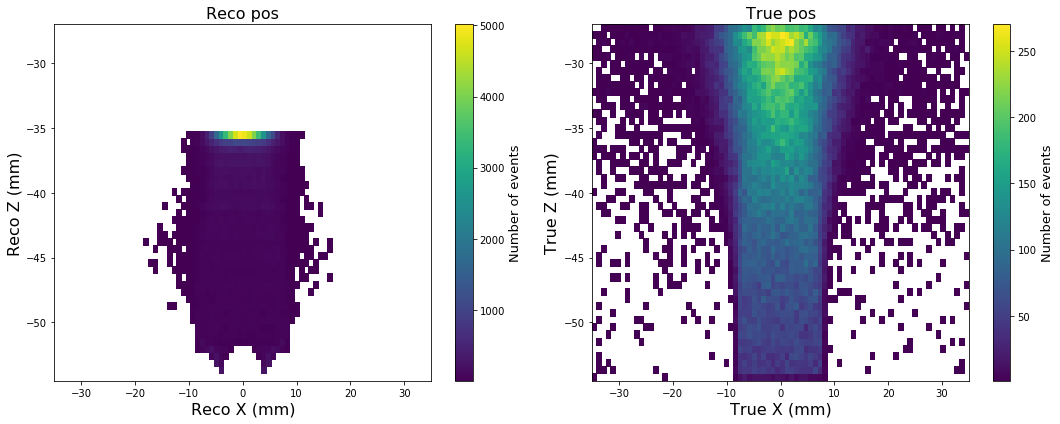

In [20]:
th = 2
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
xybins = 80
zbins  = 50

h1 = ax1.hist2d(reco_x1, reco_z1, (xybins, zbins), range=((-35,35), (-54.5, -27)), cmin=1)
h2 = ax2.hist2d(true_x1, true_z1, (xybins, zbins), range=((-35,35), (-54.5, -27)), cmin=1)

ax1.set_xlabel('Reco X (mm)', size=16)
ax1.set_ylabel('Reco Z (mm)', size=16)
ax1.set_title('Reco pos', size=16)
ax1.set_xlim(-35, 35)
ax1.set_ylim(-54.5, -27)

ax2.set_xlabel('True X (mm)', size=16)
ax2.set_ylabel('True Z (mm)', size=16)
ax2.set_title('True pos', size=16)
ax2.set_xlim(-35, 35)
ax2.set_ylim(-54.5, -27)

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events', fontsize=13)
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events', fontsize=13)

plt.tight_layout()

## Coincidence plane:

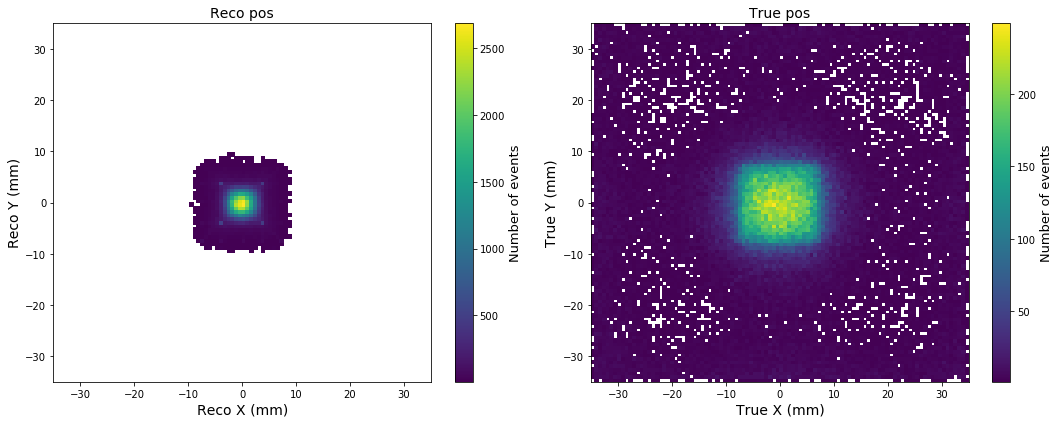

In [21]:
th = 2
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
xybins = 100

h1 = ax1.hist2d(reco_x2, reco_y2, (xybins, xybins), range=((-35,35), (-35,35)), cmin=1)
h2 = ax2.hist2d(true_x2, true_y2, (xybins, xybins), range=((-35,35), (-35,35)), cmin=1)

axis_info(ax1, 'Reco pos', 'Reco X (mm)', 'Reco Y (mm)', (-35, 35), (-35, 35))
axis_info(ax2, 'True pos', 'True X (mm)', 'True Y (mm)', (-35, 35), (-35, 35))

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events', fontsize=13)
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events', fontsize=13)

plt.tight_layout()

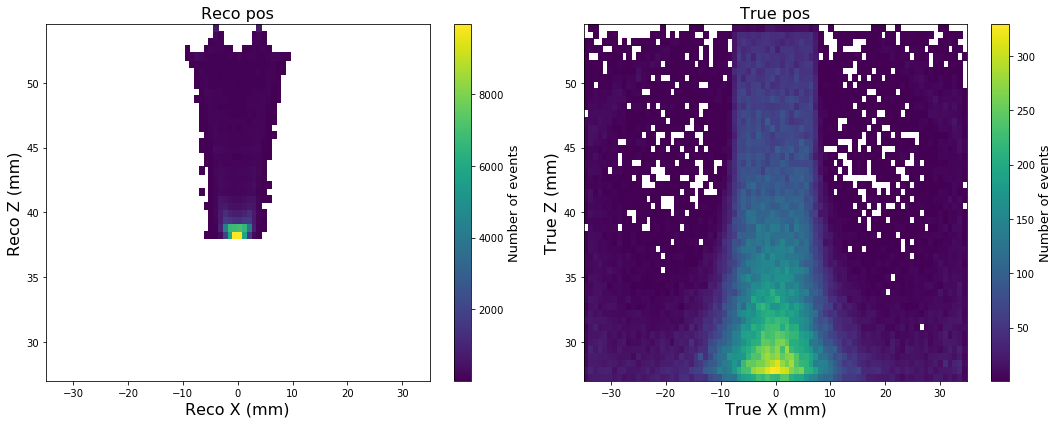

In [22]:
th = 2
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
xybins = 80
zbins  = 50

h1 = ax1.hist2d(reco_x2, reco_z2, (xybins, zbins), range=((-35,35), (27, 54.5)), cmin=1)
h2 = ax2.hist2d(true_x2, true_z2, (xybins, zbins), range=((-35,35), (27, 54.5)), cmin=1)

ax1.set_xlabel('Reco X (mm)', size=16)
ax1.set_ylabel('Reco Z (mm)', size=16)
ax1.set_title('Reco pos', size=16)
ax1.set_xlim(-35, 35)
ax1.set_ylim(27, 54.5)

ax2.set_xlabel('True X (mm)', size=16)
ax2.set_ylabel('True Z (mm)', size=16)
ax2.set_title('True pos', size=16)
ax2.set_xlim(-35, 35)
ax2.set_ylim(27, 54.5)

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events', fontsize=13)
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events', fontsize=13)

plt.tight_layout()

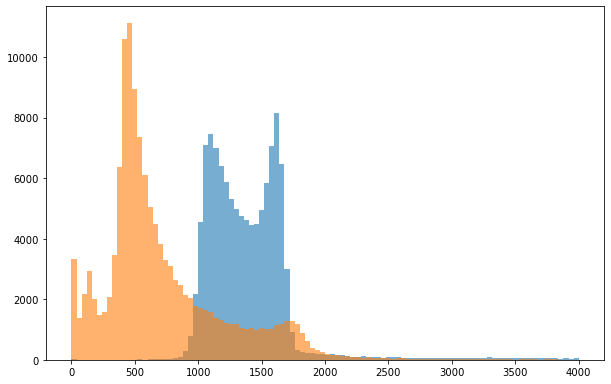

In [23]:
plt.hist(sns_resp1, 100, (0,4000), alpha=0.6)
plt.hist(sns_resp2, 100, (0,4000), alpha=0.6);

### CTR

Load the SiPM positions from a nexus file:

In [24]:
filespath     = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_h5/'
h5_filename   = filespath + 'PetBox_asymmetric_tile5centered_HamamatsuVUV.046.pet.h5'
sns_positions = pd.read_hdf(h5_filename, 'MC/sns_positions')

In [25]:
sns_positions.head()

,sensor_id,sensor_name,x,y,z
0,114,SiPMHmtsuVUV,-11.25,11.25,55.404999
1,112,SiPMHmtsuVUV,3.75,11.25,55.404999
2,113,SiPMHmtsuVUV,-3.75,11.25,55.404999
3,123,SiPMHmtsuVUV,-3.75,3.75,55.404999
4,122,SiPMHmtsuVUV,3.75,3.75,55.404999


In [26]:
def get_sipm_pos(sns_positions, id_values):
    xvals = [sns_positions[sns_positions.sensor_id == id_values[s_id]].x.values[0] 
             for s_id in range(len(id_values))]
    yvals = [sns_positions[sns_positions.sensor_id == id_values[s_id]].y.values[0] 
             for s_id in range(len(id_values))]
    zvals = [sns_positions[sns_positions.sensor_id == id_values[s_id]].z.values[0] 
             for s_id in range(len(id_values))]
    return np.array([xvals, yvals, zvals]).T

In [27]:
mask1 = np.in1d(event_ids1, event_ids_times)
mask2 = np.in1d(event_ids2, event_ids_times)

In [28]:
ave_speed_in_LXe  = 0.210 # mm/ps
speed_in_vacuum   = 0.299792458 # mm/ps
peak_speed_in_LXe = speed_in_vacuum/1.69

cart1 = np.array([reco_x1[mask1], reco_y1[mask1], reco_z1[mask1]]).T
cart2 = np.array([reco_x2[mask2], reco_y2[mask2], reco_z2[mask2]]).T

### Distance between interaction point and center of the geometry
dg1 = np.linalg.norm(cart1, axis=1)
dg2 = np.linalg.norm(cart2, axis=1)


delta_t  = []
delta_t2 = []
for j,_ in enumerate(timestamp_thr):
    first_sipm_pos1 = get_sipm_pos(sns_positions, first_sipm1[j])
    first_sipm_pos2 = get_sipm_pos(sns_positions, first_sipm2[j])

    dp1 = np.linalg.norm(np.subtract(cart1, first_sipm_pos1), axis=1)
    dp2 = np.linalg.norm(np.subtract(cart2, first_sipm_pos2), axis=1)
    
    dt  = first_time2[j] - first_time1[j] + (dp1 - dp2)/ave_speed_in_LXe  + (dg1 - dg2)/speed_in_vacuum
    dt2 = first_time2[j] - first_time1[j] + (dp1 - dp2)/peak_speed_in_LXe + (dg1 - dg2)/speed_in_vacuum
    
    delta_t .append(dt)
    delta_t2.append(dt2)

delta_t  = np.array(delta_t )
delta_t2 = np.array(delta_t2)

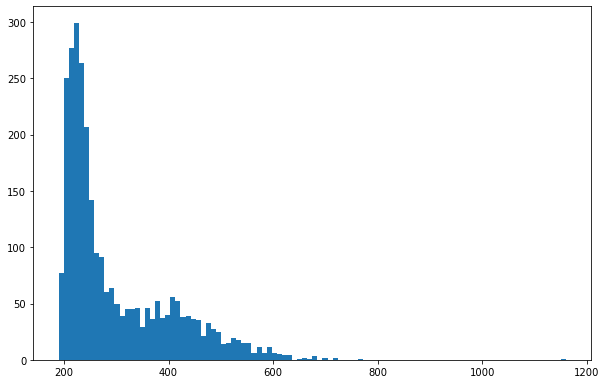

In [31]:
plt.hist(first_time2[0], 100);

In [32]:
print(delta_t.shape, delta_t[0].dtype)

(4, 2815) float64


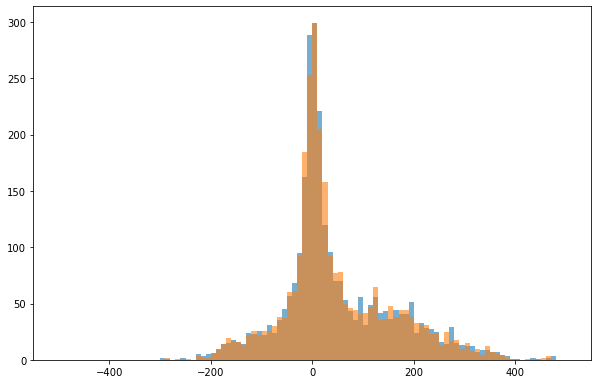

In [33]:
plt.hist(delta_t [0], 100, (-500,500), alpha=0.6)
plt.hist(delta_t2[0], 100, (-500,500), alpha=0.6);

In [34]:
print(len(event_ids1[mask1]))
print(len(delta_t[0]))
events_above_200ps = event_ids1[mask1][np.where((delta_t[0]>150))[0]]
np.sort(events_above_200ps);

2815
2815


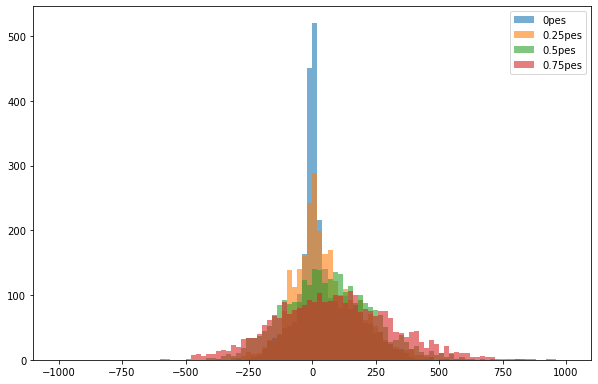

In [35]:
for dt1, ts in zip(delta_t, timestamp_thr):
    plt.hist(dt1, 100, (-1000,1000), alpha=0.6, label=f'{ts}pes')
    plt.legend()

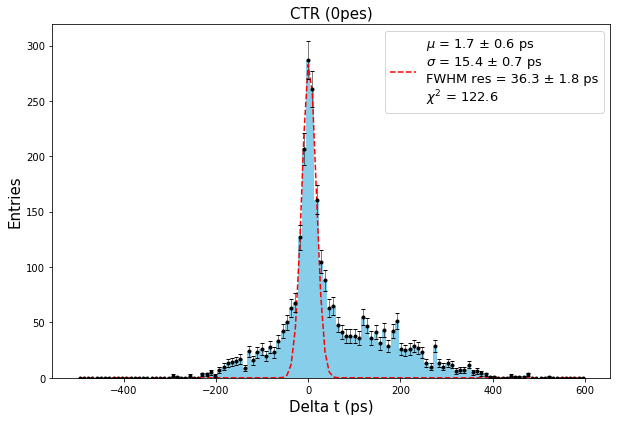

In [59]:
sel_th = 0
fit_gaussian(delta_t[sel_th], 120, (-500, 600), (-20, 20), 200, mm=False)
title_and_axes(f'CTR ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

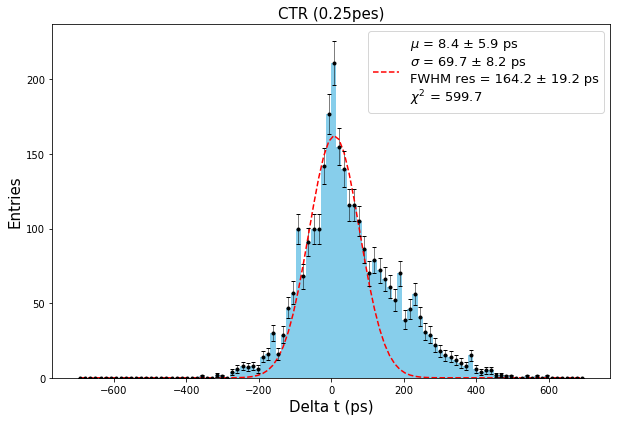

In [35]:
sel_th = 1
fit_gaussian(delta_t[sel_th], 100, (-700, 700), (-100, 100), 100, mm=False)
title_and_axes(f'CTR ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

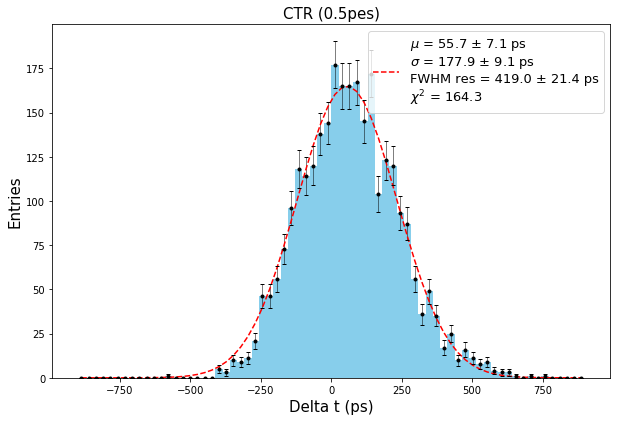

In [36]:
sel_th = 2
fit_gaussian(delta_t[sel_th], 70, (-900, 900), (-250, 250), 120, mm=False)
title_and_axes(f'CTR ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

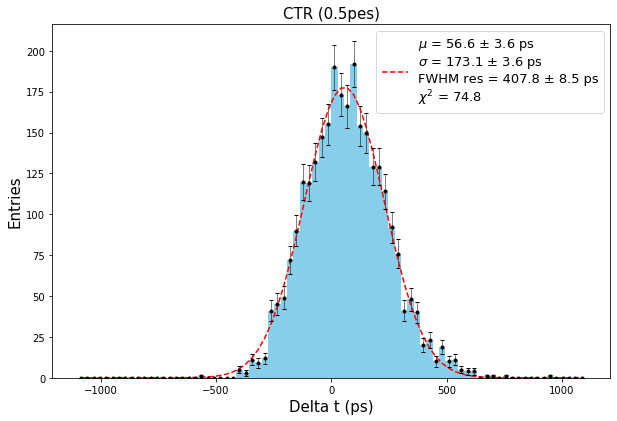

In [37]:
sel_th = 2
fit_gaussian(delta_t[sel_th], 80, (-1100, 1100), (-500, 500), 200, mm=False)
title_and_axes(f'CTR ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

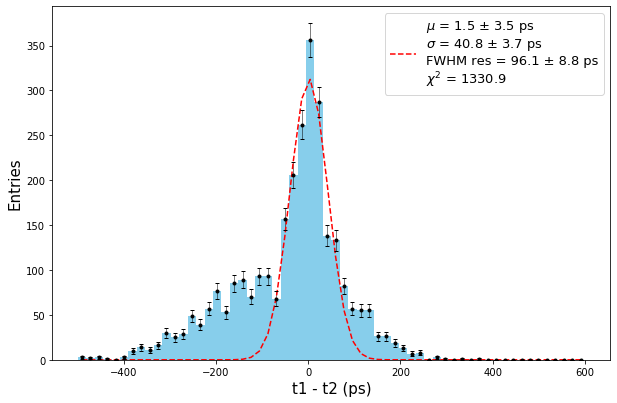

In [68]:
sel_th = 0
fit_gaussian(first_time1[sel_th] - first_time2[sel_th], 60, (-500, 600), (-80, 80), 200, mm=False)
title_and_axes('', 't1 - t2 (ps)', 'Entries', fontsize=15)

## CTR jitter

In [38]:
reco_x1_jit, reco_x2_jit = [], []
reco_y1_jit, reco_y2_jit = [], []
reco_z1_jit, reco_z2_jit = [], []

true_x1_jit, true_x2_jit = [], []
true_y1_jit, true_y2_jit = [], []
true_z1_jit, true_z2_jit = [], []

first_sipm1_jit, first_sipm2_jit = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]
first_time1_jit, first_time2_jit = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]

event_ids1_jit           = []
event_ids2_jit           = []
event_ids1_th_charge_jit = []
event_ids2_th_charge_jit = []
event_ids_times_jit      = []

for filename in os.listdir(evts_path+'jitter/'):
    if filename.endswith('.npz'):
        my_file = evts_path+'jitter/'+filename        
        d = np.load(my_file, allow_pickle=True)
        for i in d[f'reco_x1']:
            reco_x1_jit.append(i)
        for i in d[f'reco_x2']:
            reco_x2_jit.append(i)
        for i in d[f'reco_y1']:
            reco_y1_jit.append(i)
        for i in d[f'reco_y2']:
            reco_y2_jit.append(i)
        for i in d[f'reco_z1']:
            reco_z1_jit.append(i)
        for i in d[f'reco_z2']:
            reco_z2_jit.append(i)
        for i in d[f'true_x1']:
            true_x1_jit.append(i)
        for i in d[f'true_x2']:
            true_x2_jit.append(i)
        for i in d[f'true_y1']:
            true_y1_jit.append(i)
        for i in d[f'true_y2']:
            true_y2_jit.append(i)
        for i in d[f'true_z1']:
            true_z1_jit.append(i)
        for i in d[f'true_z2']:
            true_z2_jit.append(i)

        for i in d[f'event_ids1']:
            event_ids1_jit.append(i)
        for i in d[f'event_ids2']:
            event_ids2_jit.append(i)
        for i in d[f'event_ids1_th_charge']:
            event_ids1_th_charge_jit.append(i)
        for i in d[f'event_ids2_th_charge']:
            event_ids2_th_charge_jit.append(i)
        for i in d[f'event_ids_times']:
            event_ids_times_jit.append(i)
        for j,_ in enumerate(timestamp_thr):
            for i in d[f'first_sipm1_{j}']:
                first_sipm1_jit[j].append(i)
            for i in d[f'first_sipm2_{j}']:
                first_sipm2_jit[j].append(i)
            for i in d[f'first_time1_{j}']:
                first_time1_jit[j].append(i)
            for i in d[f'first_time2_{j}']:
                first_time2_jit[j].append(i)

reco_x1_jit = np.array(reco_x1_jit)
reco_x2_jit = np.array(reco_x2_jit)
reco_y1_jit = np.array(reco_y1_jit)
reco_y2_jit = np.array(reco_y2_jit)
reco_z1_jit = np.array(reco_z1_jit)
reco_z2_jit = np.array(reco_z2_jit)

true_x1_jit = np.array(true_x1_jit)
true_x2_jit = np.array(true_x2_jit)
true_y1_jit = np.array(true_y1_jit)
true_y2_jit = np.array(true_y2_jit)
true_z1_jit = np.array(true_z1_jit)
true_z2_jit = np.array(true_z2_jit)

event_ids1_jit           = np.array(event_ids1_jit)
event_ids2_jit           = np.array(event_ids2_jit)
event_ids1_th_charge_jit = np.array(event_ids1_th_charge_jit)
event_ids2_th_charge_jit = np.array(event_ids2_th_charge_jit)
event_ids_times_jit      = np.array(event_ids_times_jit)

first_sipm1_jit = np.array([np.array(i) for i in first_sipm1_jit])
first_sipm2_jit = np.array([np.array(i) for i in first_sipm2_jit])
first_time1_jit = np.array([np.array(i) for i in first_time1_jit])
first_time2_jit = np.array([np.array(i) for i in first_time2_jit])

In [39]:
first_time1_jit.shape

(4, 2815)

In [40]:
mask1_jit = np.in1d(event_ids1_jit, event_ids_times_jit)
mask2_jit = np.in1d(event_ids2_jit, event_ids_times_jit)

In [41]:
first_sipm1_jit.shape

(4, 2815)

In [42]:
ave_speed_in_LXe  = 0.210 # mm/ps
speed_in_vacuum   = 0.299792458 # mm/ps
peak_speed_in_LXe = speed_in_vacuum/1.69

cart1_jit = np.array([reco_x1_jit[mask1_jit], reco_y1_jit[mask1_jit], reco_z1_jit[mask1_jit]]).T
cart2_jit = np.array([reco_x2_jit[mask2_jit], reco_y2_jit[mask2_jit], reco_z2_jit[mask2_jit]]).T

### Distance between interaction point and center of the geometry
dg1_jit = np.linalg.norm(cart1_jit, axis=1)
dg2_jit = np.linalg.norm(cart2_jit, axis=1)

delta_t_jit  = []
delta_t2_jit = []
for j,_ in enumerate(timestamp_thr):
    first_sipm_pos1_jit = get_sipm_pos(sns_positions, first_sipm1_jit[j])
    first_sipm_pos2_jit = get_sipm_pos(sns_positions, first_sipm2_jit[j])

    dp1_jit = np.linalg.norm(np.subtract(cart1_jit, first_sipm_pos1_jit), axis=1)
    dp2_jit = np.linalg.norm(np.subtract(cart2_jit, first_sipm_pos2_jit), axis=1)
    
    dt_jit  = first_time2_jit[j] - first_time1_jit[j] + (dp1_jit - dp2_jit)/ave_speed_in_LXe  + (dg1_jit - dg2_jit)/speed_in_vacuum
    dt2_jit = first_time2_jit[j] - first_time1_jit[j] + (dp1_jit - dp2_jit)/peak_speed_in_LXe + (dg1_jit - dg2_jit)/speed_in_vacuum
    
    delta_t_jit .append(dt_jit)
    delta_t2_jit.append(dt2_jit)

delta_t_jit  = np.array(delta_t_jit )
delta_t2_jit = np.array(delta_t2_jit)

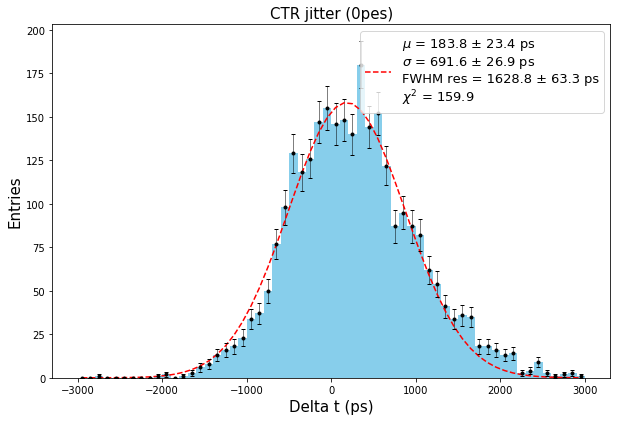

In [43]:
sel_th = 0
fit_gaussian(delta_t_jit[0], 60, (-3000, 3000), (-1000, 1500), 50, mm=False)
title_and_axes(f'CTR jitter ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

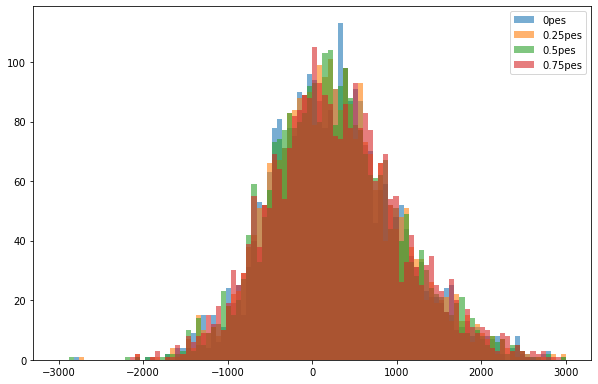

In [44]:
for dt1, ts in zip(delta_t_jit, timestamp_thr):
    plt.hist(dt1, 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')
    plt.legend()

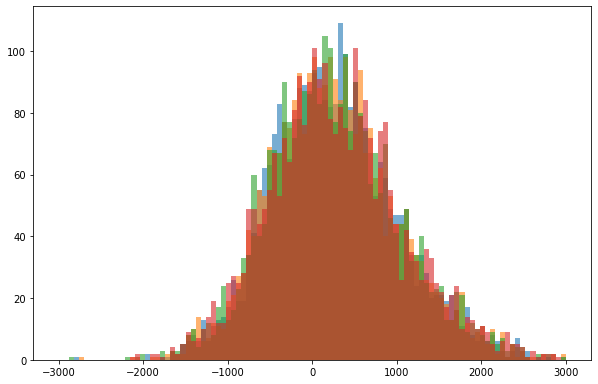

In [45]:
for j, ts in enumerate(timestamp_thr):
    plt.hist(first_time2_jit[j] - first_time1_jit[j], 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')

## jitter + average photons

In [46]:
reco_x1_jit_ave, reco_x2_jit_ave = [], []
reco_y1_jit_ave, reco_y2_jit_ave = [], []
reco_z1_jit_ave, reco_z2_jit_ave = [], []

true_x1_jit_ave, true_x2_jit_ave = [], []
true_y1_jit_ave, true_y2_jit_ave = [], []
true_z1_jit_ave, true_z2_jit_ave = [], []

first_sipm1_jit_ave, first_sipm2_jit_ave = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]
first_time1_jit_ave, first_time2_jit_ave = [[] for i in range(len(timestamp_thr))], [[] for i in range(len(timestamp_thr))]

event_ids1_jit_ave           = []
event_ids2_jit_ave           = []
event_ids1_th_charge_jit_ave = []
event_ids2_th_charge_jit_ave = []
event_ids_times_jit_ave      = []

for filename in os.listdir(evts_path+'jitter/ave10pes/'):
    if filename.endswith('.npz'):
        my_file = evts_path+'jitter/ave10pes/'+filename        
        d = np.load(my_file, allow_pickle=True)
        for i in d[f'reco_x1']:
            reco_x1_jit_ave.append(i)
        for i in d[f'reco_x2']:
            reco_x2_jit_ave.append(i)
        for i in d[f'reco_y1']:
            reco_y1_jit_ave.append(i)
        for i in d[f'reco_y2']:
            reco_y2_jit_ave.append(i)
        for i in d[f'reco_z1']:
            reco_z1_jit_ave.append(i)
        for i in d[f'reco_z2']:
            reco_z2_jit_ave.append(i)
        for i in d[f'true_x1']:
            true_x1_jit_ave.append(i)
        for i in d[f'true_x2']:
            true_x2_jit_ave.append(i)
        for i in d[f'true_y1']:
            true_y1_jit_ave.append(i)
        for i in d[f'true_y2']:
            true_y2_jit_ave.append(i)
        for i in d[f'true_z1']:
            true_z1_jit_ave.append(i)
        for i in d[f'true_z2']:
            true_z2_jit_ave.append(i)

        for i in d[f'event_ids1']:
            event_ids1_jit_ave.append(i)
        for i in d[f'event_ids2']:
            event_ids2_jit_ave.append(i)
        for i in d[f'event_ids1_th_charge']:
            event_ids1_th_charge_jit_ave.append(i)
        for i in d[f'event_ids2_th_charge']:
            event_ids2_th_charge_jit_ave.append(i)
        for i in d[f'event_ids_times']:
            event_ids_times_jit_ave.append(i)
        for j,_ in enumerate(timestamp_thr):
            for i in d[f'first_sipm1_{j}']:
                first_sipm1_jit_ave[j].append(i)
            for i in d[f'first_sipm2_{j}']:
                first_sipm2_jit_ave[j].append(i)
            for i in d[f'first_time1_{j}']:
                first_time1_jit_ave[j].append(i)
            for i in d[f'first_time2_{j}']:
                first_time2_jit_ave[j].append(i)

reco_x1_jit_ave = np.array(reco_x1_jit_ave)
reco_x2_jit_ave = np.array(reco_x2_jit_ave)
reco_y1_jit_ave = np.array(reco_y1_jit_ave)
reco_y2_jit_ave = np.array(reco_y2_jit_ave)
reco_z1_jit_ave = np.array(reco_z1_jit_ave)
reco_z2_jit_ave = np.array(reco_z2_jit_ave)

true_x1_jit_ave = np.array(true_x1_jit_ave)
true_x2_jit_ave = np.array(true_x2_jit_ave)
true_y1_jit_ave = np.array(true_y1_jit_ave)
true_y2_jit_ave = np.array(true_y2_jit_ave)
true_z1_jit_ave = np.array(true_z1_jit_ave)
true_z2_jit_ave = np.array(true_z2_jit_ave)

event_ids1_jit_ave           = np.array(event_ids1_jit_ave)
event_ids2_jit_ave           = np.array(event_ids2_jit_ave)
event_ids1_th_charge_jit_ave = np.array(event_ids1_th_charge_jit_ave)
event_ids2_th_charge_jit_ave = np.array(event_ids2_th_charge_jit_ave)
event_ids_times_jit_ave      = np.array(event_ids_times_jit_ave)

first_sipm1_jit_ave = np.array([np.array(i) for i in first_sipm1_jit_ave])
first_sipm2_jit_ave = np.array([np.array(i) for i in first_sipm2_jit_ave])
first_time1_jit_ave = np.array([np.array(i) for i in first_time1_jit_ave])
first_time2_jit_ave = np.array([np.array(i) for i in first_time2_jit_ave])

In [47]:
mask1_jit_ave = np.in1d(event_ids1_jit_ave, event_ids_times_jit_ave)
mask2_jit_ave = np.in1d(event_ids2_jit_ave, event_ids_times_jit_ave)

In [48]:
ave_speed_in_LXe  = 0.210 # mm/ps
speed_in_vacuum   = 0.299792458 # mm/ps
peak_speed_in_LXe = speed_in_vacuum/1.69

cart1_jit_ave = np.array([reco_x1_jit_ave[mask1_jit_ave], reco_y1_jit_ave[mask1_jit_ave], reco_z1_jit_ave[mask1_jit_ave]]).T
cart2_jit_ave = np.array([reco_x2_jit_ave[mask2_jit_ave], reco_y2_jit_ave[mask2_jit_ave], reco_z2_jit_ave[mask2_jit_ave]]).T

### Distance between interaction point and center of the geometry
dg1_jit_ave = np.linalg.norm(cart1_jit_ave, axis=1)
dg2_jit_ave = np.linalg.norm(cart2_jit_ave, axis=1)

delta_t_jit_ave  = []
delta_t2_jit_ave = []
for j,_ in enumerate(timestamp_thr):
    first_sipm_pos1_jit_ave = get_sipm_pos(sns_positions, first_sipm1_jit_ave[j])
    first_sipm_pos2_jit_ave = get_sipm_pos(sns_positions, first_sipm2_jit_ave[j])

    dp1_jit_ave = np.linalg.norm(np.subtract(cart1_jit_ave, first_sipm_pos1_jit_ave), axis=1)
    dp2_jit_ave = np.linalg.norm(np.subtract(cart2_jit_ave, first_sipm_pos2_jit_ave), axis=1)
    
    dt_jit_ave  = first_time2_jit_ave[j] - first_time1_jit_ave[j] + (dp1_jit_ave - dp2_jit_ave)/ave_speed_in_LXe  + (dg1_jit_ave - dg2_jit_ave)/speed_in_vacuum
    dt2_jit_ave = first_time2_jit_ave[j] - first_time1_jit_ave[j] + (dp1_jit_ave - dp2_jit_ave)/peak_speed_in_LXe + (dg1_jit_ave - dg2_jit_ave)/speed_in_vacuum
    
    delta_t_jit_ave .append(dt_jit_ave)
    delta_t2_jit_ave.append(dt2_jit_ave)

delta_t_jit_ave  = np.array(delta_t_jit_ave )
delta_t2_jit_ave = np.array(delta_t2_jit_ave)

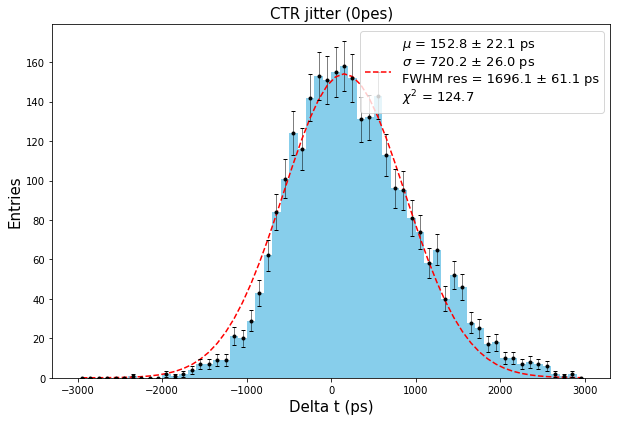

In [49]:
sel_th = 0
fit_gaussian(delta_t_jit_ave[sel_th], 60, (-3000, 3000), (-1000, 1500), 50, mm=False)
title_and_axes(f'CTR jitter ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

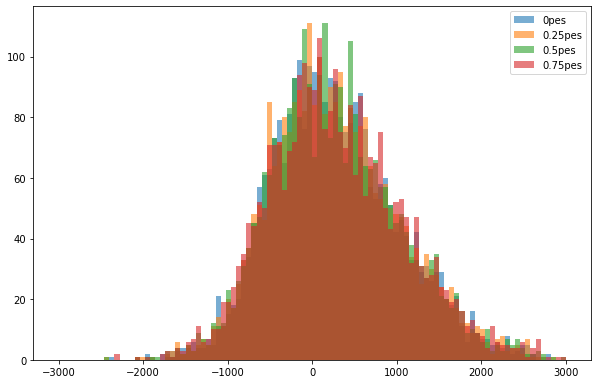

In [50]:
for dt1, ts in zip(delta_t_jit_ave, timestamp_thr):
    plt.hist(dt1, 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')
    plt.legend()

## Compare the three cases:

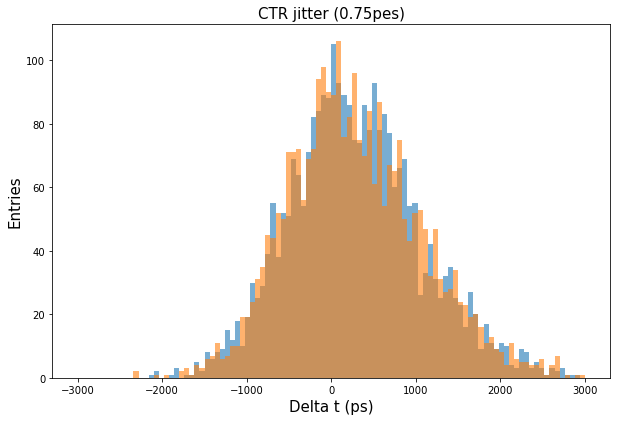

In [51]:
sel_th = 3
#plt.hist(delta_t        [sel_th], 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')
plt.hist(delta_t_jit    [sel_th], 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')
plt.hist(delta_t_jit_ave[sel_th], 100, (-3000,3000), alpha=0.6, label=f'{ts}pes')
title_and_axes(f'CTR jitter ({timestamp_thr[sel_th]}pes)', 'Delta t (ps)', 'Entries', fontsize=15)

### Trying to understand the units of time

In [54]:
import antea.reco.reco_functions as rf
import antea.elec.tof_functions  as tf
import antea.io  .mc_io          as mcio
#
from antea.utils.map_functions import load_map
from invisible_cities.core     import system_of_units as units

thr_charge1   = 1400 #pes
thr_charge2   =  200 #pes

area0       = [ 44,  45,  54,  55]
area0_tile5 = [122, 123, 132, 133]

zpos_file = '/Users/carmenromoluque/Analysis/pet_box/tile5_centered/z_var_x_table_pet_box_HamamatsuVUV_det_plane_coinc_plane_cent.h5'
zpos_file2 = '/Users/carmenromoluque/Analysis/pet_box/tile5_centered/z_var_x_table_pet_box_HamamatsuVUV_coinc_plane_cent.h5'
Zpos1 = load_map(zpos_file, group="Zpos",
                            node=f"f2pes200bins",
                            x_name='Var_x',
                            y_name='Zpos',
                            u_name='ZposUncertainty')
Zpos2 = load_map(zpos_file2, group="Zpos",
                             node=f"f2pes200bins",
                             x_name='Var_x',
                             y_name='Zpos',
                             u_name='ZposUncertainty')

sigma_sipm = 80 #ps
sigma_elec = 30 #ps

timestamp_thr      = [0, 0.25, 0.50, 0.75]
### parameters for single photoelectron convolution in SiPM response
tau_sipm           = [100, 15000]
time_window        = 5000
time               = np.arange(0, 5000)
spe_resp, norm_sns = tf.apply_spe_dist(time, tau_sipm)


sns_response  = mcio.load_mcsns_response   (h5_filename)
sns_positions = mcio.load_sns_positions    (h5_filename)
mcparticles   = mcio.load_mcparticles      (h5_filename)
mchits        = mcio.load_mchits           (h5_filename)
tof_response  = mcio.load_mcTOFsns_response(h5_filename)

tof_bin_size = mcio.read_sensor_bin_width_from_conf(h5_filename, tof=True)


DataSiPM     = sns_positions.rename(columns={"sensor_id": "SensorID","x": "X", "y": "Y", "z": "Z"})
DataSiPM_idx = DataSiPM.set_index('SensorID')

events = mcparticles.event_id.unique()
th     = 2
for evt in events:
    count1 = 0
    count2 = 0
    evt_sns   = sns_response[sns_response.event_id == evt]
    evt_parts = mcparticles [mcparticles .event_id == evt]
    evt_hits  = mchits      [mchits      .event_id == evt]
    evt_tof   = tof_response[tof_response.event_id == evt]

    evt_sns = rf.find_SiPMs_over_threshold(evt_sns, threshold=th)
    if len(evt_sns) == 0:
        continue

    ids_over_thr = evt_sns.sensor_id.astype('int64').values
    evt_tof      = evt_tof[evt_tof.sensor_id.isin(-ids_over_thr)]

    ## True info
    phot, true_pos_phot   = select_phot_pet_box(evt_parts, evt_hits, he_gamma=False)
    he_gamma, true_pos_he = select_phot_pet_box(evt_parts, evt_hits, he_gamma=True)

    sel_phot0    = np.array([pos[2] for pos in true_pos_phot])
    sel_neg_phot = sel_phot0[sel_phot0<0]
    sel_pos_phot = sel_phot0[sel_phot0>0]

    sel_he0    = np.array([pos[2] for pos in true_pos_he])
    sel_neg_he = sel_he0[sel_he0<0]
    sel_pos_he = sel_he0[sel_he0>0]

    if phot and len(sel_neg_phot)>0:
        if len(sel_neg_he)>0:
            continue

        ids1, pos1, qs1, _, _, _ = info_from_the_tiles(DataSiPM_idx, evt_sns)
        if len(qs1)==0:
            continue

        max_charge_s_id       = ids1[np.argmax(qs1)]

        if max_charge_s_id in area0:
            true_pos_neg_evt = true_pos_phot[sel_phot0<0][0]

            pos_xs1 = np.array(pos1.T[0])
            mean_x1 = np.average(pos_xs1, weights=qs1)
            var_xs1 = np.average((pos_xs1 - mean_x1)**2, weights=qs1)

            pos_ys1 = np.array(pos1.T[1])
            mean_y1 = np.average(pos_ys1, weights=qs1)

            z_pos1 = Zpos1(var_xs1).value

            if sum(qs1)>thr_charge1:
                count1 = 1


    if phot and len(sel_pos_phot)>0:
        if len(sel_pos_he)>0:
            continue
        _, _, _, ids2, pos2, qs2 = info_from_the_tiles(DataSiPM_idx, evt_sns)
        if len(qs2)==0:
            continue

        max_charge_s_id_tile5 = ids2[np.argmax(qs2)]
        if max_charge_s_id_tile5 in area0_tile5:
            true_pos_pos_evt = true_pos_phot[sel_phot0>0][0]

            pos_xs2 = np.array(pos2.T[0])
            mean_x2 = np.average(pos_xs2, weights=qs2)
            var_xs2 = np.average((pos_xs2 - mean_x2)**2, weights=qs2)

            pos_ys2 = np.array(pos2.T[1])
            mean_y2 = np.average(pos_ys2, weights=qs2)

            z_pos2 = Zpos2(var_xs2).value


            if sum(qs2)>thr_charge2:
                count2 = 1

            #if sum(qs1)>thr_charge1 and sum(qs2)>thr_charge2:
            if count1 and count2: ## Coincidences
                print(evt)
                ## produce a TOF dataframe with convolved time response
                times = evt_tof.time_bin.values * tof_bin_size / units.ps
                evt_tof['time'] = np.round(np.random.normal(times, sigma_sipm)).astype(int)
                tof_sns = evt_tof.sensor_id.unique()
                evt_tof_exp_dist = []
                for s_id in tof_sns:
                    tdc_conv    = tf.tdc_convolution(evt_tof, spe_resp, s_id, time_window)
                    tdc_conv_df = tf.translate_charge_conv_to_wf_df(evt, s_id, tdc_conv)
                    evt_tof_exp_dist.append(tdc_conv_df)
                evt_tof_exp_dist = pd.concat(evt_tof_exp_dist)

                ## Calculate different thresholds in charge
                for k, th in enumerate(timestamp_thr):
                    evt_tof_exp_dist = evt_tof_exp_dist[evt_tof_exp_dist.charge > th/norm_sns]
                    min_id1, min_id2, _, _, min_t1, min_t2 = find_coincidence_timestamps(evt_tof_exp_dist, ids1, ids2, sigma_elec, npe=1)

KeyboardInterrupt: 

In [ ]:
print(min_id1, min_id2, min_t1, min_t2)

In [ ]:
min_t1*tof_bin_size/units.ps

In [ ]:
tof_response.head()

In [ ]:
tof_bin_size

In [ ]:
evt_tof.head()

In [ ]:
tof_bin_size/units.ps

In [ ]:
times = evt_tof.time_bin.values * tof_bin_size / units.ps
evt_tof['time'] = np.round(np.random.normal(times, sigma_sipm)).astype(int)
tof_sns = evt_tof.sensor_id.unique()
evt_tof_exp_dist = []
for s_id in tof_sns:
    tdc_conv    = tf.tdc_convolution(evt_tof, spe_resp, s_id, time_window)
    tdc_conv_df = tf.translate_charge_conv_to_wf_df(evt, s_id, tdc_conv)
    evt_tof_exp_dist.append(tdc_conv_df)
evt_tof_exp_dist = pd.concat(evt_tof_exp_dist)

In [ ]:
evt_tof[evt_tof.sensor_id==-133]

In [ ]:
317*5

In [ ]:
evt_tof_exp_dist[evt_tof_exp_dist.sensor_id==-133].head()

In [ ]:
evt_tof_exp_dist.head()

In [ ]:
tof = evt_tof_exp_dist[evt_tof_exp_dist.sensor_id.isin(-ids1)]
if tof.empty:
    raise WaveformEmptyTable("Tof dataframe is empty")

tof.insert(4, 'jit_time', np.random.normal(tof.time.values, sigma_elec))

#first_times = tof.sort_values(by=['jit_time']).iloc[0:1]
#min_t       = first_times['jit_time'].mean()
#min_ids     = first_times.sensor_id.values
#min_charges = first_times.charge.values

In [ ]:
tof.head()

In [53]:

import argparse
import datetime

import numpy  as np
import pandas as pd

from typing import Sequence, Tuple

import antea.reco.reco_functions   as rf
import antea.reco.mctrue_functions as mcf

from antea.core.exceptions import WaveformEmptyTable



def info_from_the_tiles(DataSiPM_idx, evt_sns):
    sipms       = DataSiPM_idx.loc[evt_sns.sensor_id]
    sns_ids     = sipms.index.astype('int64').values
    sns_pos     = np.array([sipms.X.values, sipms.Y.values, sipms.Z.values]).transpose()
    sns_charges = evt_sns.charge.values
    sel = sipms.Z.values<0
    return (sns_ids[ sel], sns_pos[ sel], sns_charges[ sel], #Plane with 4 tiles
            sns_ids[~sel], sns_pos[~sel], sns_charges[~sel]) #Plane with 1 tile


def select_phot_pet_box(evt_parts: pd.DataFrame,
                        evt_hits:  pd.DataFrame,
                        he_gamma: str = False) -> Tuple[bool, Sequence[Tuple[float, float, float]]]:
    """
    Select only the events where one or two photoelectric events occur, and nothing else.
    """
    sel_volume   = (evt_parts.initial_volume == 'ACTIVE') & (evt_parts.final_volume == 'ACTIVE')
    sel_name     =  evt_parts.particle_name == 'e-'
    sel_vol_name = evt_parts[sel_volume & sel_name]
    ids          = sel_vol_name.particle_id.values

    sel_hits   = mcf.find_hits_of_given_particles(ids, evt_hits)
    energies   = sel_hits.groupby(['particle_id'])[['energy']].sum()
    energies   = energies.reset_index()
    if he_gamma:
        energy_sel = energies[rf.greater_or_equal(energies.energy, 1.23998, allowed_error=1.e-5)]
        primaries = evt_parts[(evt_parts.primary == True) & (evt_parts.kin_energy == 1.274537)]
    else:
        energy_sel = energies[rf.greater_or_equal(energies.energy, 0.476443, allowed_error=1.e-6)]
        primaries = evt_parts[(evt_parts.primary == True) & (evt_parts.kin_energy == 0.510999)]

    sel_vol_name_e = sel_vol_name  [sel_vol_name  .particle_id.isin(energy_sel.particle_id)]
    sel_all        = sel_vol_name_e[sel_vol_name_e.mother_id  .isin(primaries .particle_id.values)]

    if len(sel_all) == 0:
        return (False, np.array([]))

    ### Once the event has passed the selection, let's calculate the true position(s)
    ids      = sel_all.particle_id.values
    sel_hits = mcf.find_hits_of_given_particles(ids, evt_hits)

    sel_hits = sel_hits.groupby(['particle_id'])
    true_pos = []
    for _, df in sel_hits:
        hit_positions = np.array([df.x.values, df.y.values, df.z.values]).transpose()
        true_pos.append(np.average(hit_positions, axis=0, weights=df.energy))

    return (True, np.array(true_pos))


def find_first_time_of_sensors(tof_response: pd.DataFrame,
                               sns_ids: Sequence[int],
                               sigma: float = 30, n_pe: int = 1)-> Tuple[int, int]:
    """
    This function looks for the time among all sensors for the first
    photoelectron detected.
    In case more than one photoelectron arrives at the same time,
    the sensor with minimum id is chosen.
    The positive value of the id of the sensor and the time of detection
    are returned.
    """
    tof = tof_response[tof_response.sensor_id.isin(sns_ids)]
    if tof.empty:
        raise WaveformEmptyTable("Tof dataframe is empty")

    tof.insert(4, 'jit_time', np.random.normal(tof.time.values, sigma))

    first_times = tof.sort_values(by=['jit_time']).iloc[0:n_pe]
    min_t       = first_times['jit_time'].mean()
    min_ids     = first_times.sensor_id.values
    min_charges = first_times.charge.values

    return np.abs(min_ids), min_charges, min_t

def find_coincidence_timestamps(tof_response: pd.DataFrame,
                                sns1: Sequence[int],
                                sns2: Sequence[int],
                                sigma: float, npe: int)-> Tuple[int, int, int, int]:
    """
    Finds the first time and sensor of each one of two sets of sensors,
    given a sensor response dataframe.
    """
    min1, q1, time1 = find_first_time_of_sensors(tof_response, -sns1, sigma, npe)
    min2, q2, time2 = find_first_time_of_sensors(tof_response, -sns2, sigma, npe)

    return min1, min2, q1, q2, time1, time2
